In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load dataset**

In [14]:
data = pd.read_csv("/content/Dataset .csv")

**Display initial information**

In [15]:
data.head()
data.columns
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Check for missing values**

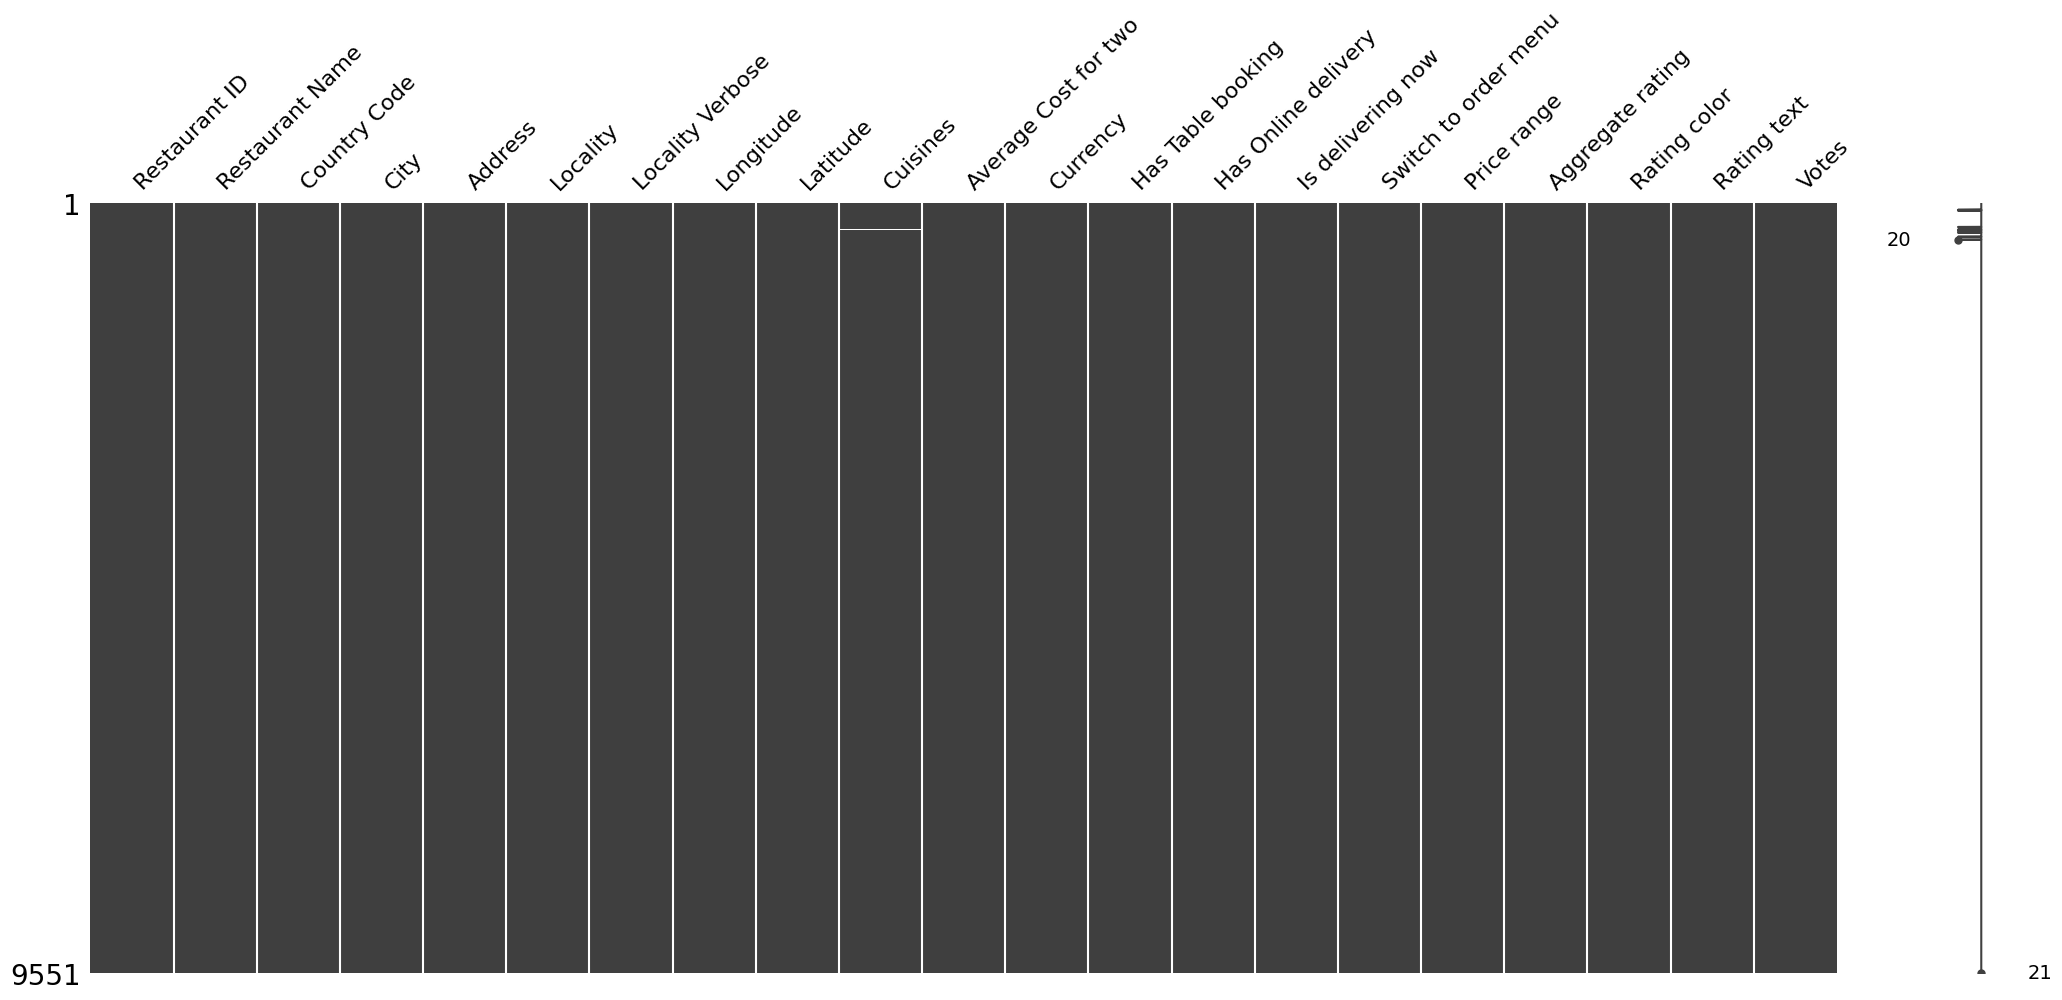

Missing values count:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [16]:
msno.matrix(data)
plt.show()
print("Missing values count:")
print(data.isnull().sum())

**Drop missing values**

In [17]:
data = data.dropna()
print("Dataset shape after removing missing values:", data.shape)

Dataset shape after removing missing values: (9542, 21)


**Data visualization**

In [18]:
px.pie(data, names="Aggregate rating", hole=0.3, template="plotly_dark").show()
px.scatter(data, x="Average Cost for two", y="Price range", color="Aggregate rating", template="plotly_dark").show()
px.scatter(data, x="Has Online delivery", y="Price range", color="Aggregate rating", template="plotly_dark").show()
px.scatter(data, x="City", y="Cuisines", color="Aggregate rating", template="plotly_dark").show()

**Encoding categorical variables**

In [19]:
encoder = LabelEncoder()
categorical_columns = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

**Encode binary categorical columns**

In [20]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
binary_mapping = {'No': 0, 'Yes': 1}
for column in binary_columns:
    data[column] = data[column].map(binary_mapping)

**Drop unnecessary columns**

In [21]:
data = data.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)

**Visualizing the data distribution**

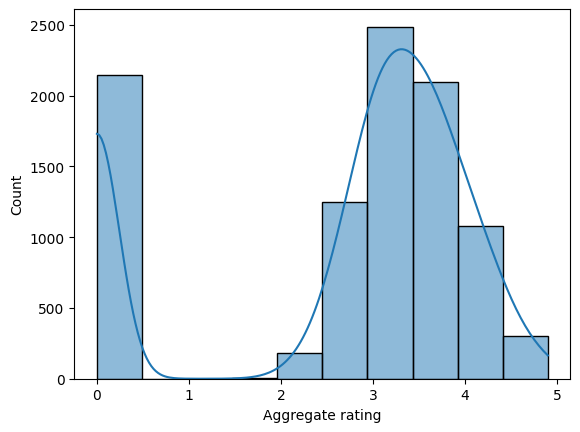

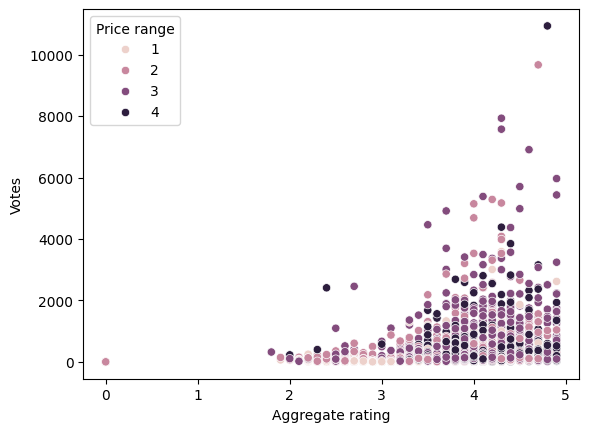

In [22]:
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.show()
sns.scatterplot(x=data["Aggregate rating"], y=data["Votes"], hue=data["Price range"])
plt.show()

**Heatmap of feature correlation**

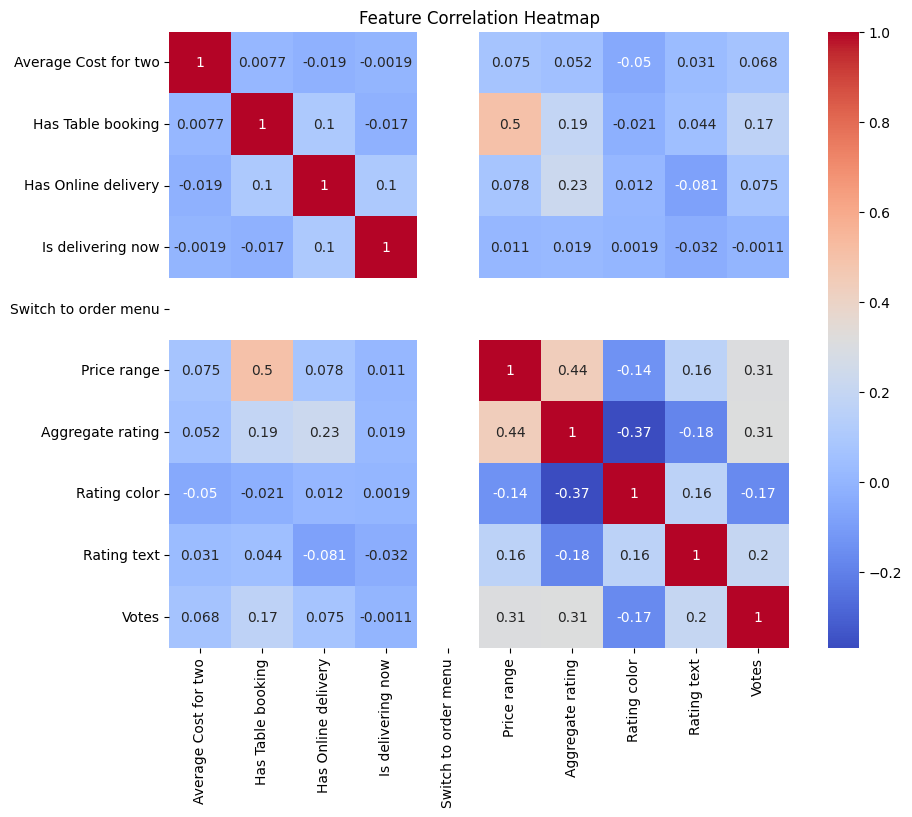

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Most Influential Features Affecting Restaurant Ratings:**
From the correlation heatmap and feature importance in Decision Tree, the most influential features impacting restaurant ratings are:

1. **Votes**
(i). Strong positive correlation with ratings.
(ii). More votes typically indicate higher popularity and credibility, influencing ratings positively.

2. **Price Range**
(i). Mid-range and high-end restaurants tend to have better ratings than very cheap ones.
(ii). However, affordability might be a factor for some users.

3. **Has Online Delivery & Has Table Booking**
(i). Restaurants offering both online delivery and table booking tend to have higher ratings.
(ii). This suggests that accessibility and convenience play a role in customer satisfaction.

4. **Cuisines & Location (Indirect impact via categorical encoding)**
(i). Certain cuisines or locations might be more popular, indirectly influencing ratings.
(ii). However, these categorical features were removed for model simplification.

5. **Is Delivering Now & Switch to Order Menu**
(i). These operational features slightly affect ratings as users prefer restaurants that are open and accessible for orders.

**Splitting data into features and target**

In [24]:
features = data.drop('Aggregate rating', axis=1)
target = data['Aggregate rating']

**Splitting data into training and testing sets**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=250)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (8587, 9) (8587,)
Testing set shape: (955, 9) (955,)


**Training with Linear Regression**

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_predictions = linear_model.predict(X_test)

**Evaluating Linear Regression**

In [27]:
lin_mae = mean_absolute_error(Y_test, linear_predictions)
lin_mse = mean_squared_error(Y_test, linear_predictions)
lin_r2 = r2_score(Y_test, linear_predictions)
print(f"Linear Regression - MAE: {lin_mae:.2f}, MSE: {lin_mse:.2f}, R2: {lin_r2:.2f}")

Linear Regression - MAE: 0.99, MSE: 1.43, R2: 0.38


**Training with Decision Tree Regressor**

In [29]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
tree_predictions = tree_model.predict(X_test)

**Evaluating Decision Tree Regressor**

In [30]:
tree_mae = mean_absolute_error(Y_test, tree_predictions)
tree_mse = mean_squared_error(Y_test, tree_predictions)
tree_r2 = r2_score(Y_test, tree_predictions)
print(f"Decision Tree - MAE: {tree_mae:.2f}, MSE: {tree_mse:.2f}, R2: {tree_r2:.2f}")

Decision Tree - MAE: 0.14, MSE: 0.05, R2: 0.98


**Conclusion**
1. Linear Regression has an MAE of 0.99, MSE of 1.43, and R2 of 0.38, indicating moderate performance but potential underfitting.
2. The Decision Tree Regressor, with an MAE of 0.14, MSE of 0.05, and R2 of 0.98, performs significantly better and captures patterns in the dataset effectively.
3. Overall, Decision Tree Regressor is the better model for predicting restaurant ratings in this case.
